In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()

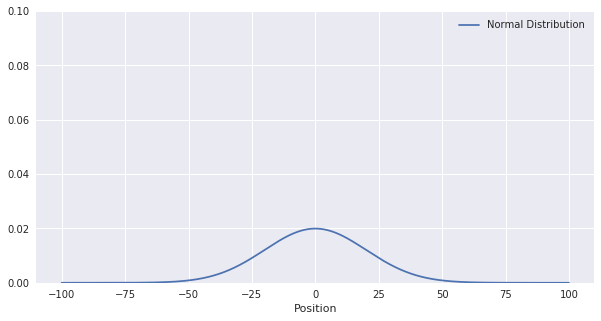

In [2]:
plt.figure(figsize=(10,5))
x = np.linspace(-100,100,1000)
original_mean = 0
original_var = 20
plt.plot(x,mlab.normpdf(x, original_mean, original_var), label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Position');

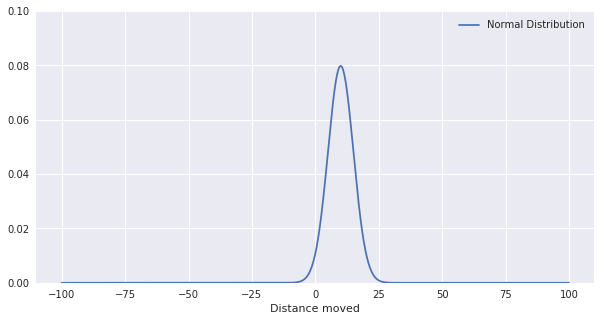

In [3]:
plt.figure(figsize=(10,5))
new_mean = 10
new_var = 5
plt.plot(x,mlab.normpdf(x, new_mean, new_var), label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Distance moved');

In [4]:
def predict(var, mean, varMove, meanMove):
    new_var = var + varMove
    new_mean= mean + meanMove
    return new_var, new_mean

In [5]:
pred_var, pred_mean = predict(original_var, original_mean, new_var, new_mean)

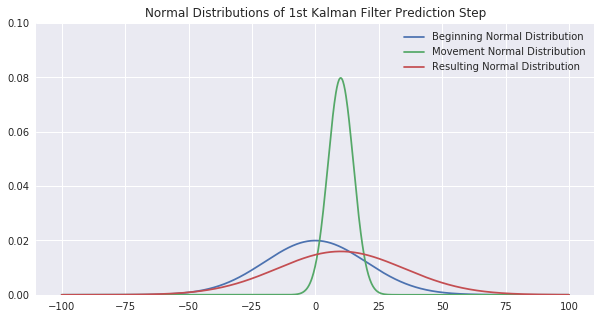

In [6]:
plt.figure(figsize=(10,5))
plt.plot(x,mlab.normpdf(x, original_mean, original_var), label='Beginning Normal Distribution')
plt.plot(x,mlab.normpdf(x, new_mean, new_var), label='Movement Normal Distribution')
plt.plot(x,mlab.normpdf(x, pred_mean, pred_var), label='Resulting Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Prediction Step');

In [7]:
sensor_mean = 25.0
sensor_var  = 12.0

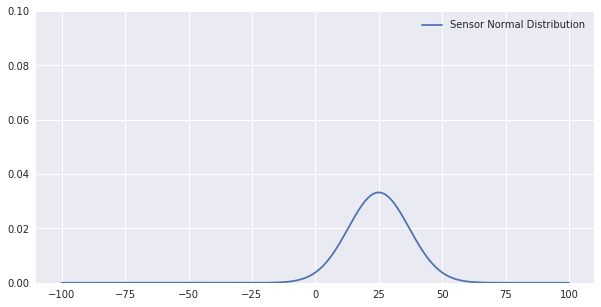

In [10]:
plt.figure(figsize=(10,5))
plt.plot(x,mlab.normpdf(x, sensor_mean, sensor_var),label='Sensor Normal Distribution')
plt.ylim(0, 0.1)
plt.legend()
plt.show()

In [11]:
def correct(var, mean, varSensor, meanSensor):
    new_mean=(varSensor*mean + var*meanSensor) / (var+varSensor)
    new_var = 1/(1/var +1/varSensor)
    return new_var, new_mean

In [12]:
var, mean = correct(pred_var, pred_mean, sensor_var, sensor_mean)

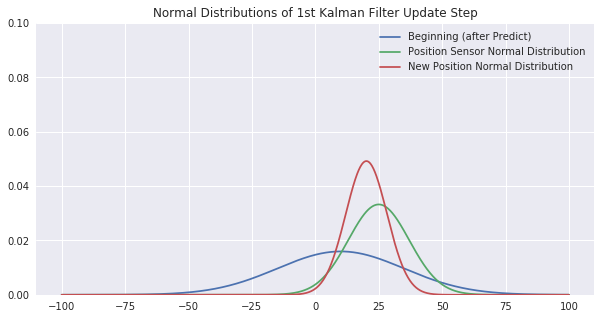

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x,mlab.normpdf(x, pred_mean, pred_var), label='Beginning (after Predict)')
plt.plot(x,mlab.normpdf(x, sensor_mean, sensor_var), label='Position Sensor Normal Distribution')
plt.plot(x,mlab.normpdf(x, mean, var), label='New Position Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Update Step')
plt.show()